# Model development
---

In this notebook we will build basic models from `sklearn` using `FeatureStore.Training Dataset`.

To begin with, let's connect to Feature Store in order to retrieve `Training Dataset`.

In [1]:
import hsfs

connection = hsfs.connection()

fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


---

## 🔮 Training Dataset retrieval

To retrieve training dataset from Feature Store we retrieve **Feature View** using `FeatureStore.get_feature_view` method.

Then we can use **Feature View** in order to retrieve **training dataset** using `FeatureView.get_training_dataset` method.

In [2]:
feature_view = fs.get_feature_view(
    name = 'electricity_data',
    version = 1
)

In [3]:
td_version, df = feature_view.get_training_dataset()

df.head()

2022-05-19 17:44:30,073 INFO: USE `electricity_demand_featurestore`
2022-05-19 17:44:30,809 INFO: SELECT `fg2`.`index` `index`, `fg2`.`date` `date`, `fg2`.`min_temperature` `min_temperature`, `fg2`.`max_temperature` `max_temperature`, `fg2`.`solar_exposure` `solar_exposure`, `fg2`.`rainfall` `rainfall`, `fg2`.`day_of_week` `day_of_week`, `fg2`.`day_of_month` `day_of_month`, `fg2`.`day_of_year` `day_of_year`, `fg2`.`week_of_year` `week_of_year`, `fg2`.`month` `month`, `fg2`.`quarter` `quarter`, `fg2`.`year` `year`, `fg0`.`school_day` `school_day`, `fg0`.`holiday` `holiday`, `fg1`.`rrp` `rrp`, `fg1`.`frac_at_neg_rrp` `frac_at_neg_rrp`, `fg1`.`demand` `demand`, `fg1`.`rrp_positive` `rrp_positive`, `fg1`.`demand_neg_rrp` `demand_neg_rrp`, `fg1`.`rrp_negative` `rrp_negative`, `fg1`.`demand_pos_rrp` `demand_pos_rrp`, `fg1`.`demand_7_mean` `demand_7_mean`, `fg1`.`demand_7_std` `demand_7_std`, `fg1`.`demand_14_mean` `demand_14_mean`, `fg1`.`demand_14_std` `demand_14_std`, `fg1`.`demand_30_mean

,index,date,min_temperature,max_temperature,solar_exposure,rainfall,day_of_week,day_of_month,day_of_year,week_of_year,...,rrp_positive,demand_neg_rrp,rrp_negative,demand_pos_rrp,demand_7_mean,demand_7_std,demand_14_mean,demand_14_std,demand_30_mean,demand_30_std
0,1803,2019-12-09,16.3,38.0,28.6,0.0,0,9,343,50,...,70.771049,11257.86,-20.717997,116652.975,107191.424286,10557.275237,107408.967857,8256.705104,107776.225500,8689.339445
1,465,2016-04-10,13.6,23.5,9.6,0.0,6,10,101,14,...,35.120546,0.00,0.000000,99845.345,117899.222143,9814.535425,115225.037857,9747.522729,115691.728167,11512.879110
2,550,2016-07-04,10.4,12.7,3.6,0.0,0,4,186,27,...,124.136886,0.00,0.000000,135712.245,131846.523571,11495.037409,134462.529643,9735.529029,132402.165167,9085.695593
3,168,2015-06-18,10.7,12.7,4.2,1.0,3,18,169,25,...,37.457764,0.00,0.000000,137073.775,133482.565000,8990.376248,131278.706429,12342.700424,131822.913833,11642.171736
4,1899,2020-03-14,13.1,17.9,12.3,0.6,5,14,74,11,...,29.137326,0.00,0.000000,96016.190,107076.063571,12177.997814,107961.805714,10022.328767,110341.526500,10557.434759


---

## 🤖 Model Building

### 📝 Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score

## 🪓 Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['index','demand'],axis = 1),
    df.demand,
    test_size = 0.2,
    random_state = 42
)

### 🧑🏻‍🔬 RandomForestRegressor

In [6]:
model = RandomForestRegressor(
    n_estimators = 25,
    max_features = 'sqrt',
    n_jobs = -1,
    random_state = 42
)

model.fit(X_train.drop('date',axis = 1),y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [7]:
preds = model.predict(X_test.drop('date',axis = 1))

r2_score(y_test, preds)

0.967155587834412

---

### 🧑🏻‍🔬 XGBoost

In [8]:
reg = xgb.XGBRegressor(
    n_estimators=25,
    random_state = 42
)

reg.fit(X_train.drop('date',axis = 1),y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=42, reg_alpha=0, ...)

In [9]:
preds = reg.predict(X_test.drop('date',axis = 1))

r2_score(y_test, preds)

0.9973650663421454

---

## 🔬 🧬 Model Predictions Visualization

In [10]:
X_test['preds'] = preds
X_train['target'] = y_train
X_train.date = pd.to_datetime(X_train.date)
X_test.date = pd.to_datetime(X_test.date)

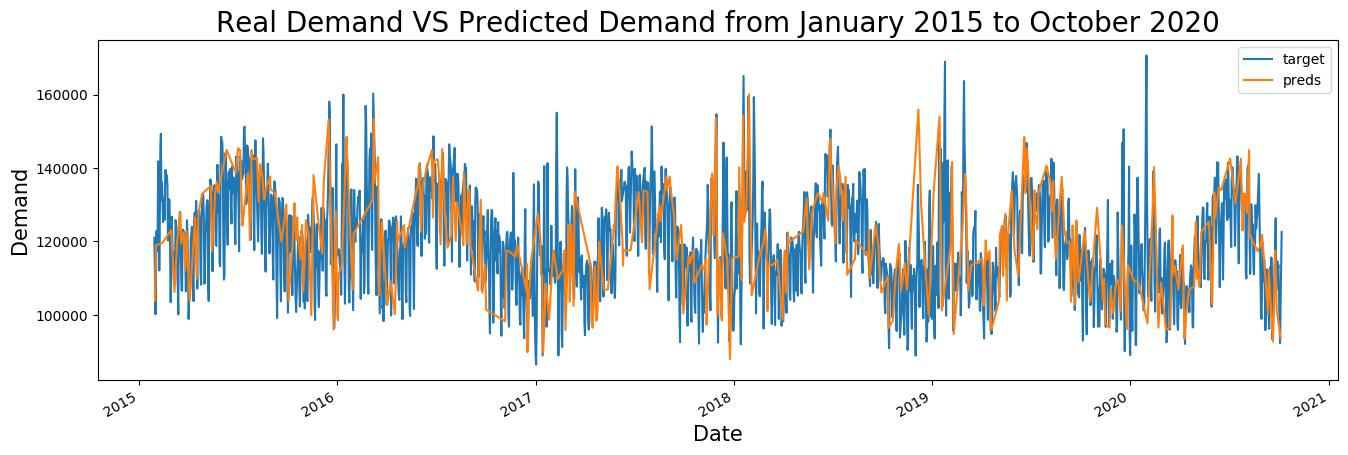

In [11]:
fig,ax = plt.subplots(figsize = (16,5))

X_train.plot('date','target', ax = ax)
X_test.plot('date','preds', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Demand',fontsize = 15)
ax.set_title('Real Demand VS Predicted Demand from January 2015 to October 2020',fontsize = 20)

plt.show()

---